# 4. gyakorlat (Dinamikus programozás)
A mai órán az előző gyakorlat példáit vesszük alapul, megnézzük, hogy miért nem érdemes mindig rekurziót használni, még ha kézenfekvő is lenne, valamint megnézzük, hogy mi az, amit érdemes csinálni helyette. A gyakorlat végén áttekintjük, hogy mely esetek azok, ahol rekurziót, és melyek azok, ahol pedig DP-t érdemes használni.

## Amikor a rekurzió csődöt mond
Tekintsünk egy egyszerű, előző órai példát, ahol rekurzív eljárást készítettünk a Fibonacci-sorozat *n.* tagjának meghatározásához. A gyakorlathoz tartozó notebookban már leírtam, hogy ennek az eljárásnak a futási ideje *O(2^n)*, ami gyakorlatilag azt jelenti, hogy valós helyzetekben használhatatlan. Ennek oka abban rejlik, hogy számos eredményt újra és újra kiszámolunk ahelyett, hogy valamilyen módon "megjegyeznénk":
![Fibonacci rekurziós hívási fa](img/4_fib.png)

Nézzük is meg, hogyan birkózik meg a rekurzív algoritmus egy kicsit nagyobb *n*-re:

In [1]:
def fibonacci_recursive(n):
    if n==1 or n==2:
        return 1
    return fibonacci_recursive(n-1)+fibonacci_recursive(n-2)

In [8]:
fibonacci_recursive(37)

24157817

## Dinamikus programozási problémák
Abban az esetben, ha felfedezzük egy feladatban a részproblémákra bonthatóságot, kicsit tovább kell még vizsgálódnunk. Amennyiben a részproblémák nem függetlenek egymástól (lásd előző példa: *fib(4)* nem független *fib(3)*-tól, hiszen tartalmazza azt), **ne használjunk rekurziót**, helyette válasszuk a dinamikus programozást, melynek lényege, hogy az egyes részproblémák megoldásait eltároljuk, így amennyiben bármikor szükség van rájuk, nem kell újraszámolni őket. Természetesen [nincs ingyen ebéd](https://en.wikipedia.org/wiki/No_free_lunch_theorem), ilyenkor memóriára van szükség, viszont ezzel a módszerrel lineáris (*O(n)*), vagy polinomiális (*O(n^a)*, ahol *a>1*) időben megoldhatók a rekurzióval exponenciális idejű problémák. Nézzük az előző órai lépcsős feladatot rekurzívan, ill. DP megoldással, vizualizálva az eljárás végrehajtásához szükséges lépéseket növekvő *n*-ekre:

In [9]:
# vizualizációs könyvtár betöltése
import matplotlib.pyplot as plt

In [35]:
# az eljárásnak adunk egy c paramétert is, ebben tároljuk a végrehajtott utasítások számát.
def stairs_r(n,c):
    if n==1 or n==2:
        return n
    c[0] += 1
    return stairs_r(n-1,c)+stairs_r(n-2,c)

In [36]:
def stairs_dp(n,c):
    dp_array = [1, 2]
    for i in range(2, n):
        c[0] += 1
        dp_array.append(dp_array[i-1]+dp_array[i-2])
    return dp_array[n-1]

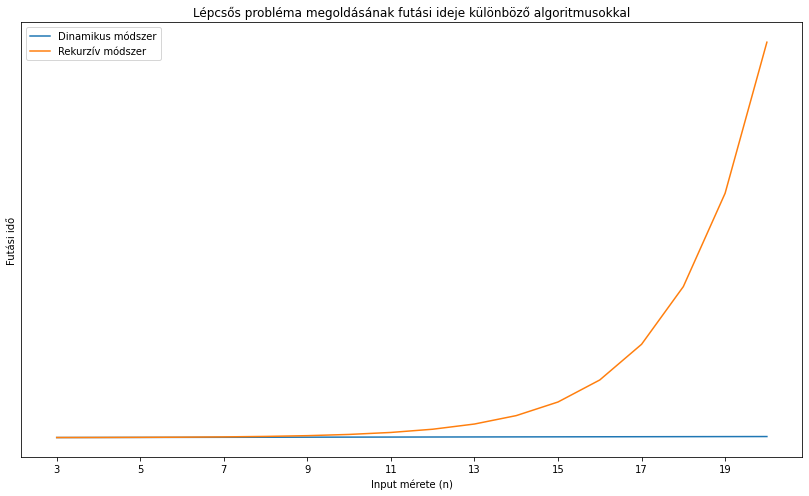

In [37]:
inputs = [i for i in range(3,21)] # inputs = [3, 4, ..., 20]
recursive_times = [] # ebben a listában tároljuk a rekurzív algoritmushoz tartozó futási időket
dp_times = [] # itt pedig a dp-seket

for n in inputs:
    c_r = [0] # rekurzív számláló, listába ágyazva, hogy referenciaként adódjon át
    c_dp = [0] # dp számláló
    stairs_r(n, c_r)
    stairs_dp(n, c_dp)
    recursive_times.append(c_r[0])
    dp_times.append(c_dp[0])
    
plt.figure(figsize=(14,8))
plt.title('Lépcsős probléma megoldásának futási ideje különböző algoritmusokkal')
plt.xlabel('Input mérete (n)')
plt.ylabel('Futási idő')
plt.xticks([i for i in range(3,21,2)])
plt.yticks([])
plt.plot(inputs,dp_times, label="Dinamikus módszer")
plt.plot(inputs,recursive_times, label="Rekurzív módszer")
plt.legend()
plt.show()
    

Látható, hogy a DP módszer jóval hatékonyabb, azonban nyilván ehhez memória szükséges, ami azért erre a problémára nem olyan vészes. A fenti implementációval tulajdonképpen *O(n)* tárra van szükségünk ([igen, tárigényre is használjuk a nagy ordó jelölést](https://en.wikipedia.org/wiki/Space_complexity)), de ha belegondolunk, elég mindig az aktuálisan számolandó eredményt megelőző két számot tárolni, ebben az esetben a tárigény már csak *O(1)*.
### Sakktáblás feladat
Folytassuk tovább szintén egy előző órai feladattal (a leírást lásd a 3. gyakorlati jegyzetben):

In [39]:
# numerikus könyvtár betöltése (többdimenziós tömbök kezeléséhez ez már sokkal kényelmesebb)
import numpy as np

In [45]:
# rekurzív megoldás
def chess_r(n,k):
    if n==1 or k==1:
        return 1
    return chess_r(n-1,k)+chess_r(n,k-1)

In [46]:
# DP megoldás
def chess_dp(n,k):
    chessboard = np.ndarray((n,k)) # n x k méretű, 2D tömb
    
    # minden sor első oszlopát feltöltjük 1-esekkel
    for i in range(0, n):
        chessboard[i,0] = 1
        
    # hasonlóan a sorokkal
    for j in range(0, k):
        chessboard[0,j] = 1
        
    # az előző órán meghatározott összefüggéssel feltöltjük a táblázatot
    for i in range(1, n):
        for j in range(1, k):
            chessboard[i,j] = chessboard[i-1,j] + chessboard[i,j-1]
            
    return chessboard[n-1, k-1]

In [48]:
chess_r(15,15)

40116600

In [49]:
chess_dp(15,15)

40116600.0

Vegyük észre, hogy ebben az esetben a futási idő *O(n x k)* (ez kb. négyzetes, ha *n* és *k* nagyjából megegyeznek), a tárigény pedig szintén *O(n x k)*, hiszen ekkora tömb kell az eredmények tárolásához, ennél azonban szintén tudunk jobbat: mivel sorról-sorra haladunk felfelé a táblázat kitöltésével, mindig csak az éppen "alattunk lévő" sort, illetve az aktuálisat kell eltárolnunk, hiszen ezek kellenek a számolások megvalósításához, ezzel megint csak faragható a tárigény.

### Pénzváltási feladat
Adottak különböző pénzérmék korlátlan mennyiségben (*P1, P2, ..., Pn*, és jellemzően *P1 = 1*), és egy összeg (*F*). Adjuk meg, hogy
összesen hány különböző módon lehet felváltani az összeget a megadott pénzérmékkel!

**Megoldás:** Két eset következhet be egy érme kiválasztásakor:
1. Felhasználunk egy *Pn* érmét, a probléma pedig ugyanaz marad, csupán most már *F-Pn* összegre
2. Nem használjuk fel a *Pn* érmét, ekkor viszont a későbbiekben sem fogjuk már (hiszen ha bármikor máskor megtennénk, akkor mindegy, hogy most, vagy később tesszük meg), így a probléma továbbra is *F* összeg felváltása, de most már csak a *P1, P2, ..., P(n-1)* érmék felhasználásával.

Mivel minden esetet szeretnénk összeszámolni, ezért az aktuális állapotban ezen két részprobléma eseményszámának összege lesz az eredeti probléma megoldása. Ezek alapján, ha *C(P,n,F)* jelölti az *F* összeg összes lehetséges kifizetését a *P* érmetömb első *n* érméjének felhasználásával, akkor felírható, hogy

*C(P,n,F) = C(P,n,F-Pn)+C(P,n-1,F)*.

Az alapesetek is látszódnak innen már: amennyiben csak 1-es érméink vannak, vagy az F összeg már csak 1-esekből rakható ki, a részfeladat megoldása 1.

In [17]:
def coinChange(P, n, F):
    table = np.ones((F+1,))
    table[0] = 1
    print(table.shape)
    for i in range(0, n):
        for j in range(P[i], F+1):
            table[j] += table[j-P[i]]
    return table[n]

In [18]:
coinChange([1,5,7],3,11)

(12,)


4.0

### Pontgyűjtő feladat
Adott egy *n x k* méretű tábla. Minden *(i,j)* mezőre meg van adva egy *c* pozitív szám, ami a mezőről begyűjthető érték. Egy játékos a bal alsó sarokból szeretne eljutni a jobb felső sarokba úgy, hogy csak jobbra és felfelé léphet a szomszédos mezőre. Az útja során összegyűjtheti a mezőkről az értékeket. Mennyi értéket tudunk összeszedni maximálisan? Hogyan határoznánk meg ezt az utat, amin a maximális értéket gyűjthetjük?

In [1]:
import numpy as np

def maxCost(C, n, k):
    maxArr = np.ndarray((n,k)) # eredmény tömb
    maxArr[0,0] = C[0,0]
    
    for i in range(1, n):
        maxArr[i,0] = maxArr[i-1,0] + C[i,0]
        
    for j in range(1, k):
        maxArr[0,j] = maxArr[0,j-1] + C[0,j]
        
    for i in range(1, n):
        for j in range(1, k):
            maxArr[i,j] = C[i,j] + max(maxArr[i-1,j], maxArr[i,j-1])
    
    return maxArr[n-1,k-1]

In [2]:
C = np.array([
            [1, 2, 4, 2],
            [2, 5, 1, 3],
            [1, 4, 4, 2]
            ])
maxCost(C,3,4)

18.0